In [1]:
import xarray as xr
import double_slit as ds
from double_slit import ds_para
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

"""
Import data
"""
data=xr.open_dataset("y_data.nc")
data

<xarray.Dataset>
Dimensions:                (dim_1: 450, time: 7803)
Coordinates:
  * time                   (time) float64 1.634e+09 1.634e+09 ... 1.634e+09
Dimensions without coordinates: dim_1
Data variables:
    tms_diag_y_projection  (time, dim_1) float64 ...

In [3]:
x0_pred=ds_para(intensity=1000, sx=0.07, x0=225, offset=450,  #example for an initial guess
                visibility=1.6, a3=0.2, phase=3.15)

x=np.arange(450)
visibility_list = []
error_list = []

for i in tqdm(range(7803)):
    y=data.tms_diag_y_projection[i,:]  #get data
    
    Regressor = ds.double_slit_reg(x0_pred=x0_pred)  #initialize regressor
    Regressor.fit(x,y)  #fit
    
    visibility_list.append(Regressor.x.visibility)  #how to obtain the visibility
    error_list.append(np.mean(np.abs(Regressor.predict(x)-np.array(y))))  #get MAE
    if Regressor.cost>1300*450:
        print(k)

100%|██████████| 7803/7803 [16:16<00:00,  7.99it/s]


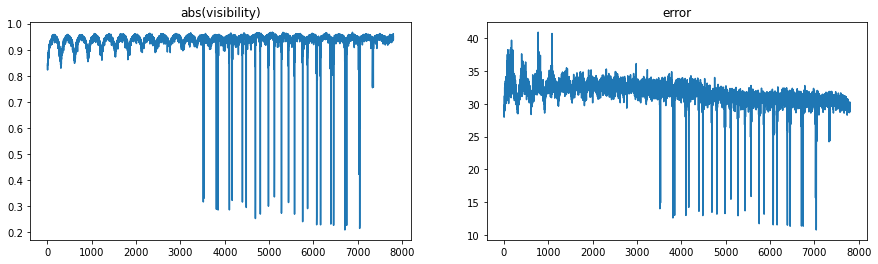

In [6]:
fig, axs = plt.subplots(1, 2,figsize=(15,4))

axs[0].plot(np.arange(7803),np.abs(visibility_list))
axs[0].title.set_text("abs(visibility)")
axs[1].plot(np.arange(7803),error_list)
axs[1].title.set_text("error")

# Start value adaptation #

In [7]:
Regressor = ds.double_slit_reg()  #initialize regressor at the beginning

parameters=np.zeros((7803,7))              #empty matrices, where we will store 
error_array=np.zeros((7803,1))             #the parameters/ error

x=np.arange(450)

for i in tqdm(range(7803)):    
    y=data.tms_diag_y_projection[i,:]  #get y-value
    Regressor.fit(x,y)  #keep fitting, without initializing new regrtessor
    error_array[i]=np.mean(np.abs(Regressor.predict(x)-np.array(y)))
    parameters[i,:]=Regressor.x.to_array()

100%|██████████| 7803/7803 [01:17<00:00, 100.11it/s]


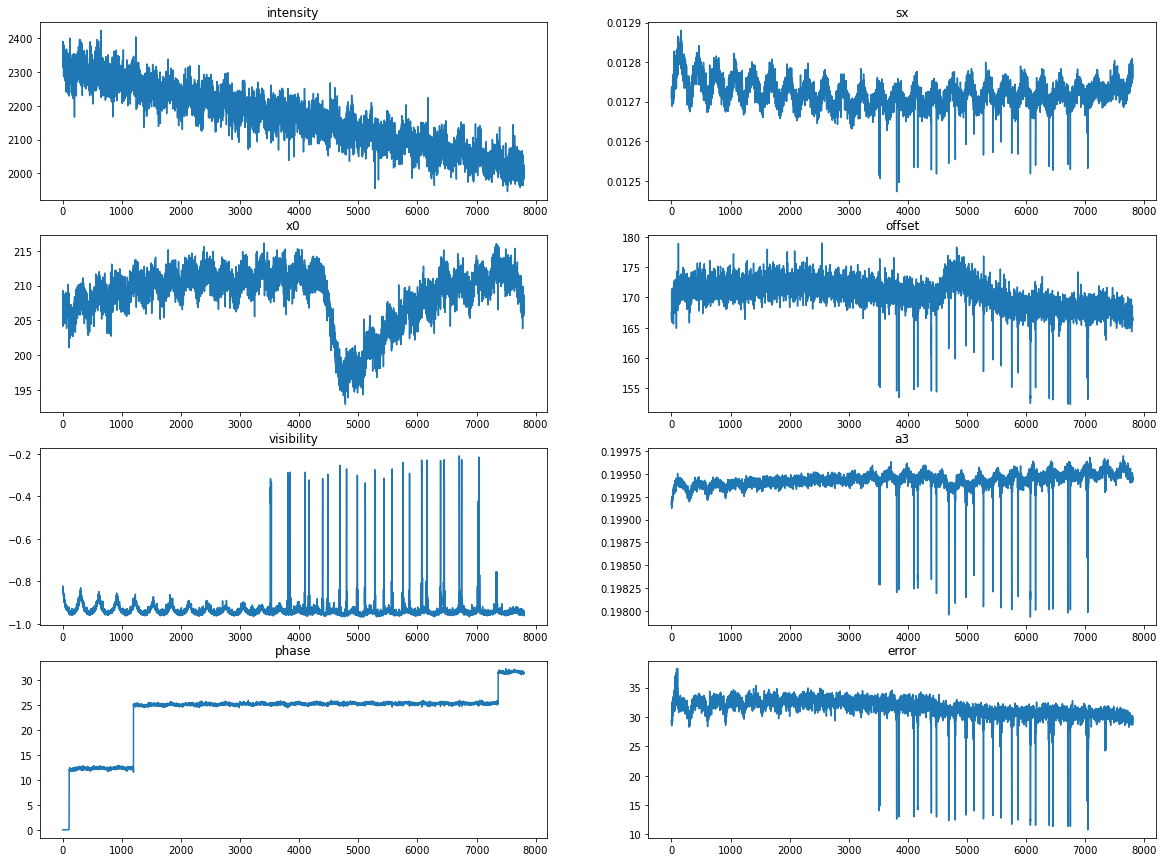

In [8]:
label_list=["intensity", "sx", "x0", "offset", "visibility", "a3", "phase"]
fig, axs = plt.subplots(4, 2,figsize=(20,15))
for i in range(4):
    for j in range(2):
        if i==3 and j==1:
            break
        x=np.arange(7803)
        axs[i,j].plot(x,parameters[:,2*i+j])
        axs[i,j].title.set_text(label_list[2*i+j])
axs[3,1].plot(x,error_array)
axs[3,1].title.set_text("error")

Notice the big difference in calculation time.

If the start parameter is choosen poorly this can impact the time needed for fitting.